# –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è —Ç–∞—Ä–∏—Ñ–æ–≤

–í –≤–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã–µ –æ –ø–æ–≤–µ–¥–µ–Ω–∏–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É–∂–µ –ø–æ–º–µ–Ω—è–ª–∏ —Ç–∞—Ä–∏—Ñ—ã. –ù—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–±–µ—Ä–µ—Ç –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ç–∞—Ä–∏—Ñ. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è ‚Äî –≤—ã –µ—ë —É–∂–µ —Å–¥–µ–ª–∞–ª–∏.

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –º–æ–¥–µ–ª—å —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º *accuracy*. –ß—Ç–æ–±—ã —Å–¥–∞—Ç—å –ø—Ä–æ–µ–∫—Ç —É—Å–ø–µ—à–Ω–æ, –Ω—É–∂–Ω–æ –¥–æ–≤–µ—Å—Ç–∏ –¥–æ–ª—é –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –¥–æ 0.75. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ *accuracy* –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ.

In [190]:
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É—é –±–∏–±–ª–∏–æ—Ç–µ–∫—É –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å—Ç–∞—Ç—É—Å-–±–∞—Ä–∞
import tqdm

## –û—Ç–∫—Ä–æ–π—Ç–µ –∏ –∏–∑—É—á–∏—Ç–µ —Ñ–∞–π–ª

In [191]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [192]:
data.head()

calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π

In [193]:
# –∑–∞–ø–∏—à–µ–º —Å–≤–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ç–∞–±–ª–∏—Ü—É
res_table = data.describe()
res_table

calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000

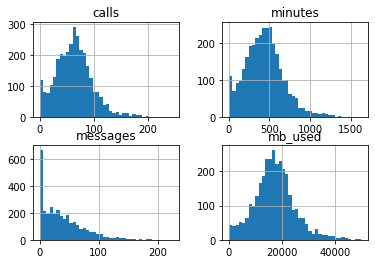

In [194]:
data.drop(['is_ultra'],axis=1).hist(bins=40);

–í–∏–¥–∏–º, —á—Ç–æ –æ–∫–æ–ª–æ –Ω—É–ª—è —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω–æ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π.
–û—Ç–¥–µ–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –≤ –Ω–∏–∂–Ω–µ–º (1%) –∫–≤–∞–Ω—Ç–∏–ª–µ

In [195]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—Ä–µ–∑–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ–ª—è
def cut(data,clmn,qmn,qmx): # qmn,qmx- –Ω–∏–∂–Ω–∏–π –∏ –≤–µ—Ä—Ö–Ω–∏–π –∫–≤–∞–Ω—Ç–∏–ª–∏
    out = data[(data[clmn]<=data[clmn].
   quantile(qmx)) & (data[clmn]>=data[clmn].
   quantile(qmn))][clmn]
    return out

In [196]:
# –∑–∞–ø–∏—à–µ–º –Ω–∞ –ø–∞–º—è—Ç—å
fit_list = ['calls','minutes','messages','mb_used']
targ_list= ['is_ultra']
clmn_list= fit_list+targ_list

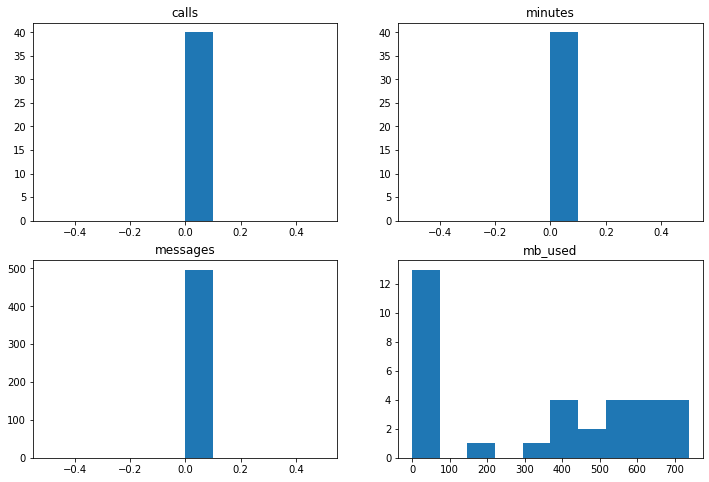

In [197]:
cutoff = 0.01
figure, axis = plt.subplots(2, 2, figsize=(12,8))
axis[0,0].hist(cut(data,'calls',0,cutoff))
axis[0,0].set_title('calls')
axis[0,1].hist(cut(data,'minutes',0,cutoff))
axis[0,1].set_title('minutes')
axis[1,0].hist(cut(data,'messages',0,cutoff))
axis[1,0].set_title('messages')
axis[1,1].hist(cut(data,'mb_used',0,cutoff))
axis[1,1].set_title('mb_used')
plt.show()

–û—Ç–¥–µ–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –≤ –ø–æ–ª–µ is_ultra

In [198]:
data['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

–í –ø–æ–ª–µ is_ultra –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è (0 - 69% –∏ 1 - 31%)

–ü–æ—Å—á–∏—Ç–∞–µ–º –¥–æ–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–π —Ä–∞–≤–Ω—ã—Ö –Ω—É–ª—é –¥–ª—è –≤—Å–µ—Ö –ø–æ–ª–µ–π

In [199]:
for clmn in clmn_list:
    res_table.loc['zerro_count',clmn]=data[data[clmn]==0][clmn].count()/len(data)
res_table

calls      minutes     messages       mb_used     is_ultra
count        3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean           63.038892   438.208787    38.281269  17207.673836     0.306472
std            33.236368   234.569872    36.148326   7570.968246     0.461100
min             0.000000     0.000000     0.000000      0.000000     0.000000
25%            40.000000   274.575000     9.000000  12491.902500     0.000000
50%            62.000000   430.600000    30.000000  16943.235000     0.000000
75%            82.000000   571.927500    57.000000  21424.700000     1.000000
max           244.000000  1632.060000   224.000000  49745.730000     1.000000
zerro_count     0.012446     0.012446     0.154636      0.003423     0.693528

–í–∏–¥–∏–º, —á—Ç–æ –ø–æ–ª–µ "messages" –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–æ—Å—Ä–µ–¥–æ—Ç–∞—á–∏–≤–∞–µ—Ç –≤ –Ω—É–ª–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—É—é –¥–æ–ª—é (15,5%) –∑–Ω–∞—á–µ–Ω–∏–π. –ê calls –∏ minutes –≤—Å–µ–≥–æ –ª–∏—à—å 1,2%

–¢–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤–æ–¥–Ω—ã–µ —Ç–∞–±–ª–∏—Ü—ã –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –¥–≤—É—Ö —Ç–∞—Ä–∏—Ñ–æ–≤

In [200]:
# —Å–≤–æ–¥–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ç–∞—Ä–∏—Ñ–æ –£–õ–¨–¢–†–ê
res_table_ultra = data[data['is_ultra']==1].describe()
for clmn in clmn_list:
    res_table_ultra.loc['zerro_count',clmn]=data[
                        (data[clmn]==0) & data['is_ultra']==1][clmn].count()/len(data)
res_table_ultra

calls      minutes    messages       mb_used  is_ultra
count        985.000000   985.000000  985.000000    985.000000     985.0
mean          73.392893   511.224569   49.363452  19468.823228       1.0
std           43.916853   308.031100   47.804457  10087.178654       0.0
min            0.000000     0.000000    0.000000      0.000000       1.0
25%           41.000000   276.030000    6.000000  11770.280000       1.0
50%           74.000000   502.550000   38.000000  19308.010000       1.0
75%          104.000000   730.050000   79.000000  26837.720000       1.0
max          244.000000  1632.060000  224.000000  49745.730000       1.0
zerro_count    0.010579     0.010579    0.059116      0.003111       0.0

In [201]:
# –°–≤–æ–¥–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ç–∞—Ä–∏—Ñ–∞ –°–ú–ê–†–¢
res_table_smart = data[data['is_ultra']==0].describe()
for clmn in clmn_list:
    res_table_smart.loc['zerro_count',clmn]=data[
                        (data[clmn]==0) & data['is_ultra']==0][clmn].count()/len(data)
res_table_smart

calls      minutes     messages       mb_used  is_ultra
count        2229.000000  2229.000000  2229.000000   2229.000000    2229.0
mean           58.463437   405.942952    33.384029  16208.466949       0.0
std            25.939858   184.512604    28.227876   5870.498853       0.0
min             0.000000     0.000000     0.000000      0.000000       0.0
25%            40.000000   274.230000    10.000000  12643.050000       0.0
50%            60.000000   410.560000    28.000000  16506.930000       0.0
75%            76.000000   529.510000    51.000000  20043.060000       0.0
max           198.000000  1390.220000   143.000000  38552.620000       0.0
zerro_count     0.989421     0.989421     0.940884      0.996889       1.0

–í–∏–¥–∏–º, —á—Ç–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è - –Ω–∞ –°–ú–ê–†–¢–µ. –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –£–ª—å—Ç—Ä—ã –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ "–≤—ã–±–∏—Ä–∞—é—Ç" –æ–ø–ª–∞—á–µ–Ω–Ω–æ–µ.

–¢–∞–∫–∂–µ –≤–ø–æ–ª–Ω–µ –æ–∂–∏–¥–∞–µ–º–æ–µ –ø—Ä–µ–≤—ã—à–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ç–∞—Ä–∏—Ñ–µ —É–ª—å—Ç—Ä–∞. –î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞–≤–Ω–∏–º –º–µ—Ç—Ä–∏–∫–∏

In [202]:
idx = res_table.index
res_table_diff = pd.DataFrame(index = idx)
for i in idx:
    for clmn in clmn_list:
        if res_table_smart.loc[i,clmn] != 0:
            res_table_diff.loc[i,clmn]=((res_table_ultra.loc[i,clmn]-res_table_smart.loc[i,clmn])/
                                        res_table_smart.loc[i,clmn])
        else:
            res_table_diff.loc[i,clmn] = 0
res_table_diff

calls   minutes  messages   mb_used  is_ultra
count       -0.558098 -0.558098 -0.558098 -0.558098 -0.558098
mean         0.255364  0.259351  0.478655  0.201151  0.000000
std          0.693026  0.669431  0.693519  0.718283  0.000000
min          0.000000  0.000000  0.000000  0.000000  0.000000
25%          0.025000  0.006564 -0.400000 -0.069032  0.000000
50%          0.233333  0.224060  0.357143  0.169691  0.000000
75%          0.368421  0.378728  0.549020  0.339003  0.000000
max          0.232323  0.173958  0.566434  0.290333  0.000000
zerro_count -0.989308 -0.989308 -0.937169 -0.996879 -1.000000

–û—Ç–º–µ—Ç–∏–º –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –ø—Ä–µ–≤—ã—à–µ–Ω–∏–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –£–ª—å—Ç—Ä—ã –Ω–∞–¥ –°–º–∞—Ä—Ç–æ–º –ø–æ –≤—Å–µ–º –ø–æ–ª—è–º. –¢–∞–∫–∂–µ 75% –∫–≤–∞–Ω—Ç–∏–ª—å –ø–æ–ª—è messages –£–ª—å—Ç—Ä—ã –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –°–º–∞—Ä—Ç, –ø—Ä–∏ –æ–±—Ä–∞—Ç–Ω–æ–π –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –≤ 25% –∫–≤–∞—Ä—Ç–∏–ª–µ (–Ω–∞ –£–ª—å—Ç—Ä–µ –≤ —Ü–µ–ª–æ–º –±–æ–ª—å—à–µ –ø–æ–ª—å–∑—É—Ç—Å—è —Å–æ–æ–±—â–µ–Ω–∏—è–º–∏, –ø—Ä–∏ —ç—Ç–æ–º –∞–∫—Ç–∏–≤–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å–æ–æ–±—â–µ–Ω–∏–π –Ω–∞ –£–ª—å—Ç—Ä–µ –±–æ–ª–µ–µ –∞–∫—Ç–∏–≤–Ω—ã)

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —Ü–µ–ª–æ–º –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É –∏ –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –¥–≤—É—Ö —Ç–∞—Ä–∏—Ñ–æ–≤

In [203]:
data[fit_list].corr()

calls   minutes  messages   mb_used
calls     1.000000  0.982083  0.177385  0.286442
minutes   0.982083  1.000000  0.173110  0.280967
messages  0.177385  0.173110  1.000000  0.195721
mb_used   0.286442  0.280967  0.195721  1.000000

In [204]:
data[data['is_ultra']==1][fit_list].corr()

calls   minutes  messages   mb_used
calls     1.000000  0.988235  0.087691  0.176856
minutes   0.988235  1.000000  0.083000  0.178003
messages  0.087691  0.083000  1.000000  0.173710
mb_used   0.176856  0.178003  0.173710  1.000000

In [205]:
data[data['is_ultra']!=1][fit_list].corr()

calls   minutes  messages   mb_used
calls     1.000000  0.972654  0.208789  0.357349
minutes   0.972654  1.000000  0.203746  0.341639
messages  0.208789  0.203746  1.000000  0.146499
mb_used   0.357349  0.341639  0.146499  1.000000

–ò–º–µ–µ–º:
- –ø–æ–Ω—è—Ç–Ω—É—é –ø–æ—á—Ç–∏ 100% –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –∑–≤–æ–Ω–∫–∞–º–∏ –∏ –º–∏–Ω—É—Ç–∞–º–∏ (–≤–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –≤–æ–æ–±—â–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –∏—Å–∫–ª—é—á–∏—Ç—å –¥–ª—è –ú–û?)
- —Å–ª–∞–±—É—é –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å–æ–æ–±—â–µ–Ω–∏–π —Å –¥—Ä—É–≥–∏–º–∏ –ø–æ–ª—è–º–∏ (–≤ –£–ª—å—Ç—Ä–µ –∑–∞–º–µ—Ç–Ω–æ —Å–ª–∞–±–µ–µ)
- —É—Å–ª–æ–≤–Ω–æ —Å—Ä–µ–¥–Ω—é—é –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è –°–º–∞—Ä—Ç–∞ –º–µ–∂–¥—É –º–µ–≥–∞–±–∞–π—Ç–∞–º–∏ –∏ –∑–≤–æ–Ω–∫–∞–º–∏
- —É—Å–ª–æ–≤–Ω–æ —Å–ª–∞–±—É—é –ø—Ä—è–º—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–ª—è –£–ª—å—Ç—Ä—ã –º–µ–∂–¥—É –º–µ–≥–∞–±–∞–π—Ç–∞–º–∏ –∏ –¥—Ä—É–≥–∏–º–∏ –ø–æ–ª—è–º–∏

–ü–æ—Å–ª–µ–¥–Ω–µ–µ- –ø–æ—Å–º–æ—Ç—Ä–∏–º –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

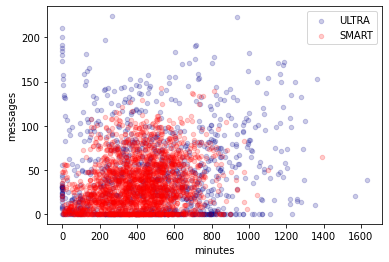

In [206]:
ax = data[data['is_ultra']==1].plot.scatter(x='minutes',y='messages',color="DarkBlue", label="ULTRA",alpha=0.2)
data[data['is_ultra']==0].plot.scatter(x='minutes',y='messages',color="Red", label="SMART", alpha=0.2, ax=ax);

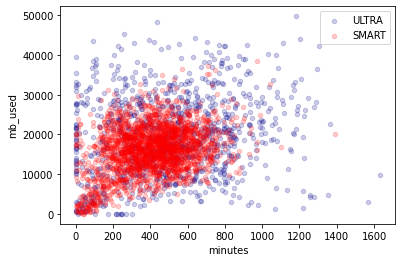

In [207]:
ax = data[data['is_ultra']==1].plot.scatter(x='minutes',y='mb_used',color="DarkBlue", label="ULTRA",alpha=0.2)
data[data['is_ultra']==0].plot.scatter(x='minutes',y='mb_used',color="Red", label="SMART", alpha=0.2, ax=ax);

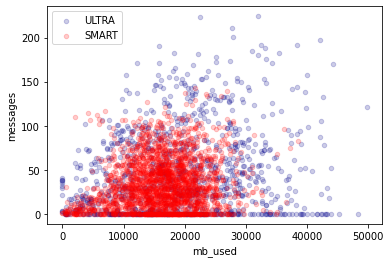

In [208]:
ax = data[data['is_ultra']==1].plot.scatter(x='mb_used',y='messages',color="DarkBlue", label="ULTRA",alpha=0.2)
data[data['is_ultra']==0].plot.scatter(x='mb_used',y='messages',color="Red", label="SMART", alpha=0.2, ax=ax);

–í–∏–¥–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –°–ú–ê–†–¢–∞ —Å–∏–ª—å–Ω–µ–µ —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –≤–æ–∑–ª–µ —Å–≤–æ–µ–≥–æ "—è–¥—Ä–∞". –í –æ—Å—Ç–∞–ª—å–Ω–æ–º- "—Ä—É–∫–∞–º–∏ –Ω–µ —Ä–∞—Å—Å–æ—Ä—Ç–∏—Ä—É–µ—à—å".

–ù—É —á—Ç–æ –∂. –ù–∞—á–Ω–µ–º –≤–æ—Ä–æ–∂–∏—Ç—å!

## –†–∞–∑–±–µ–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏

In [209]:
features = data[fit_list]
target = data[targ_list]
# —Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
features_train_undiv, features_test, target_train_undiv, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)
# –µ—â–µ —Ä–∞–∑ —Ä–∞–∑–¥–µ–ª–∏–º —Ç–µ–ø–µ—Ä—å —É–∂–µ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é
# —É—Å—Ç–∞–Ω–æ–≤–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä  —Å–ø–ª–∏—Ç–∞ –≤—ã–±–æ—Ä–∫–∏
fetch = 0.25
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_undiv, target_train_undiv, test_size=0.2, random_state=12345)
display('–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_train.shape)
display('–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_valid.shape)
display('–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_test.shape)

'–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(2056, 4)

'–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(515, 4)

'–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(643, 4)

## –ò—Å—Å–ª–µ–¥—É–π—Ç–µ –º–æ–¥–µ–ª–∏

### –ü—Ä–æ–±–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –º–æ–¥–µ–ª–µ–π

–†–∞—Å—Å—á–∏—Ç–∞–µ–º –ø—Ä–æ–±–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –º–æ–¥–µ–ª–µ–π —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –≤ —Ä–∞–º–∫–∞—Ö —Å–ø—Ä–∏–Ω—Ç–∞ –ø–æ –ú–û

In [210]:
# —Å–≤–µ–¥–µ–º –¥–∞–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—ã
# –∑–∞–ø–∏—à–µ–º —ç—Ç–∏ –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–∏ –≤ –≤–∏–¥–µ —Ñ—É–Ω–∫—Ü–∏–∏
def models_df():
    # –º–æ–¥–µ–ª—å —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞
    md = 5 # –≤–≤–µ–¥–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –¥–ª—è –≥–ª—É–±–∏–Ω—ã
    model_dtcl = DecisionTreeClassifier(random_state=12345, max_depth=md)
    model_dtcl.fit(features_train, target_train)
    predictions_train = model_dtcl.predict(features_train)
    accuracy_dtcl_train = accuracy_score(target_train, predictions_train)
    predictions_valid = model_dtcl.predict(features_valid)
    accuracy_dtcl_valid = accuracy_score(target_valid, predictions_valid)

    # –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
    est = 40 # –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ü–µ–Ω—â–∏–∫–æ–≤
    model_rfcl = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_rfcl.fit(features_train, target_train)
    predictions_train = model_rfcl.predict(features_train)
    accuracy_rfcl_train = accuracy_score(target_train, predictions_train)
    predictions_valid = model_rfcl.predict(features_valid)
    accuracy_rfcl_valid = accuracy_score(target_valid, predictions_valid)

    # –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    itr = 1000 # –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π
    model_logr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
    model_logr.fit(features_train, target_train)
    predictions_train = model_logr.predict(features_train)
    accuracy_logr_train = accuracy_score(target_train, predictions_train)
    predictions_valid = model_logr.predict(features_valid)
    accuracy_logr_valid = accuracy_score(target_valid, predictions_valid)
    
    out_dtcl = pd.DataFrame() # –¥–ª—è —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞
    out_dtcl.loc[0,['common_fetch','dtcl_depth','accuracy_dtcl_train','accuracy_dtcl_valid']]=[
                                        fetch,md,accuracy_dtcl_train,accuracy_dtcl_valid]
    
    out_rfcl = pd.DataFrame() # –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
    out_rfcl.loc[0,['common_fetch','rfcl_estimators','accuracy_rfcl_train','accuracy_rfcl_valid']]=[
                                        fetch,est,accuracy_rfcl_train,accuracy_rfcl_valid]
    
    out_logr = pd.DataFrame() # –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
    out_logr.loc[0,['common_fetch','logr_iter','accuracy_logr_train','accuracy_logr_valid']]=[
                                        fetch,itr,accuracy_logr_train,accuracy_logr_valid]
    
    return out_dtcl, out_rfcl, out_logr, model_dtcl, model_rfcl, model_logr

out_dtcl, out_rfcl, out_logr, model_dtcl, model_rfcl, model_logr = models_df()

display(out_dtcl)
display(out_rfcl)
display(out_logr)

common_fetch  dtcl_depth  accuracy_dtcl_train  accuracy_dtcl_valid
0          0.25         5.0             0.828307             0.757282

common_fetch  rfcl_estimators  accuracy_rfcl_train  accuracy_rfcl_valid
0          0.25             40.0             0.998541             0.778641

common_fetch  logr_iter  accuracy_logr_train  accuracy_logr_valid
0          0.25     1000.0             0.753891             0.716505

–í–∏–¥–∏–º, —á—Ç–æ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –¥–∞–µ—Ç 100% –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π. –ö–∞—á–µ—Å—Ç–≤–æ –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —É—Å—Ç–æ–π—á–∏–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

<div class="alert alert-warning">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π üëâ</b>

**–í–∏–¥–∏–º, —á—Ç–æ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –¥–∞–µ—Ç 100% –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π** - —ç—Ç–æ —Ç–∞–∫ –∏ –µ—Å—Ç—å. –≠—Ç–æ –ø—Ä–æ—Å—Ç–æ –¥–∞–Ω–Ω–æ—Å—Ç—å, –ø—Ä–∏—Å—É—â–∞—è —Ç–∞–∫–æ–º—É –º–µ—Ç–æ–¥—É –ø—Ä–æ–≤–µ—Ä–∫–∏.
</div>

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø–æ –æ–¥–Ω–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É –¥–ª—è –º–æ–¥–µ–ª–∏

–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –≤–ª–∏—è–µ—Ç –∏–∑–º–µ–Ω–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–≤ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–∏ —Å —Ç–µ–æ—Ä–∏–µ–π) –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π:
- –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏—è - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π
- –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π - –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞
- —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω—â–∏–∫–æ–≤

–û—Ü–µ–Ω–∏–≤–∞—Ç—å –±—É–¥–µ–º –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ª—å–∫–æ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –∫–∞—á–µ—Å—Ç–≤–æ –±—É–¥–µ—Ç —Å–µ–±—è –≤–µ—Å—Ç–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ä–∞–∑–±–∏–µ–Ω–∏–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ (—Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É (20% –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞) –Ω–µ —Ç—Ä–æ–≥–∞–µ–º- –¥–µ–ª–∏–º –≤ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–æ–ø–æ—Ä—Ü–∏—è—Ö –æ—Å—Ç–∞–≤—à–∏–µ—Å—è 80%)

–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å—Ç–∞—Ç—É—Å –±–∞—Ä - —Å–ª–µ–¥—É—é—â–∏–π —Ü–∏–∫–ª –Ω–∞ –º–æ–µ–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ –∑–∞–Ω–∏–º–∞–µ—Ç –æ–∫–æ–ª–æ 2 –º–∏–Ω—É—Ç

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

–ü–æ—Å–º–æ—Ç—Ä–∏–º –≤–∞—Ä–∏–∞–Ω—Ç—ã –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π. –ü—Ä–æ–≤–µ—Ä–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞.

–û–ø—Ä–µ–¥–µ–ª–∏–º –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã.

–î–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
- solver - –æ—Å—Ç–∞–≤–∏–º lbfgs, –ø–æ—Å–∫–æ–ª—å–∫—É –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –Ω–µ –ø–æ–¥—Ö–æ–¥—è—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏ –∏ –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ –ø–æ–ª–µ–π, —Ç–∞–∫–∂–µ - —É –Ω–∞—Å –≤—Å–µ–≥–æ 2 –∫–ª–∞—Å—Å–∞)
- penalty - ['l2', ‚Äònone‚Äô] - –¥–æ—Å—Ç—É–ø–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –¥–ª—è solver='lbfgs'
- C - –±—É–¥–µ–º –º–µ–Ω—è—Ç—å [0.1,0.5,1,5,10,30,50,100,200]
- class_weightdict - –æ—Å—Ç–∞–≤–∏–º default=None (—Å—á–∏—Ç–∞–µ–º, —á—Ç–æ —Å–æ–æ—Ç–Ω–æ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ 30/70 - —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ)
- max_iter - –æ—Å—Ç–∞–≤–∏–º –¥–µ—Ñ–æ–ª—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ

–î–ª—è –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π:
- criterion - ['gini', 'entropy'] –ø–∏—à—É—Ç, —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å - –ø—Ä–æ–≤–µ—Ä–∏–º
- splitter - –æ—Å—Ç–∞–≤–∏–º 'best'  –∏–∑-–∑–∞ –º–∞–ª–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- max_depth - –æ—Ç 1 –¥–æ 30, —à–∞–≥ 2
- min_samples_split - –æ—Ç 1 –¥–æ 40 (–ø–∏—à—É—Ç, —á—Ç–æ –≤ —ç—Ç–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω- –ø—Ä–æ–≤–µ—Ä–∏–º)
- min_samples_leaf - –æ—Ç 1 –¥–æ 20 (–ø–∏—à—É—Ç, —á—Ç–æ –≤ —ç—Ç–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω- –ø—Ä–æ–≤–µ—Ä–∏–º)
- min_impurity_decrease - –æ—Ç 0.0 –¥–æ 1.0

–î–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞:
- n_estimators - –æ—Ç 20 –¥–æ 50, —à–∞–≥ 2
- max_depth - –æ—Ç 1 –¥–æ 30, —à–∞–≥ 2
- min_samples_split - –æ—Ç 1 –¥–æ 40
- min_samples_leaf -  –æ—Ç –æ—Ç 1 –¥–æ 20


–¢–µ–ø–µ—Ä—Ä—å –∑–∞–ø—É—Å—Ç–∏–º —Ü–∏–∫–ª –≤ –∫–æ—Ç–æ—Ä–æ–º –ø–æ–º–µ–Ω—è–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–µ–π.

–°–ø–ª–∏—Ç –≤—ã–±–æ—Ä–∫–∏ - 0.25

In [211]:
fetch = 0.25
features_train, features_valid, target_train, target_valid = train_test_split(
 features_train_undiv, target_train_undiv, test_size=fetch, random_state=12345)
display('–û–±—É—á–∞—é—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç',data.shape)
display('–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_train.shape)
display('–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_valid.shape)
display('–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤',features_test.shape)

'–û–±—É—á–∞—é—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç'

(3214, 5)

'–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(1928, 4)

'–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(643, 4)

'–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞  –ø—Ä–∏–∑–Ω–∞–∫–æ–≤'

(643, 4)

In [212]:
# "–û–±–Ω—É–ª–∏–º" —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—ã
out_dtcl, out_rfcl, out_logr, model_dtcl, model_rfcl, model_logr = models_df()

In [213]:
# –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è - –∏–∑–º–µ–Ω—è–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
C_list = [0.1,0.5,1,5,10,30,50,100,200]
iter_list = [int(x) for x in range(800,2200,200)]
penalty_list = ['l2', 'none'] # –¥–æ—Å—Ç—É–ø–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –¥–ª—è solver='lbfgs'
#max_iter_list = [int(x) for x in range(100, 2050, 50)]
# –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å–Ω–∞—á–∞–ª–∞ –Ω–∞–ø—Ä—è–º—É—é- –º–µ—Ç–æ–¥–æ–º –ø–µ—Ä–µ–±–æ—Ä–∞
start = time.monotonic()
for c_var in tqdm.tqdm(C_list):
    for pen_var in penalty_list:
        for i_var in iter_list:
            model_logr = LogisticRegression(random_state=12345, solver='lbfgs',
                                C=c_var,penalty=pen_var,max_iter=i_var)
            model_logr.fit(features_train, target_train)
            predictions_train = model_logr.predict(features_train)
            accuracy_logr_train = accuracy_score(target_train, predictions_train)
            predictions_valid = model_logr.predict(features_valid)
            accuracy_logr_valid = accuracy_score(target_valid, predictions_valid)
            idx = out_logr.index.max() + 1
            out_logr.loc[idx,['common_fetch','C','penalty','logr_iter',
            'accuracy_logr_train','accuracy_logr_valid']]=[
                fetch,c_var,pen_var,i_var,accuracy_logr_train,accuracy_logr_valid]
end = time.monotonic()
print('time span: ','{:,.4f}'.format(end-start))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9/9 [00:03<00:00,  2.46it/s]

time span:  3.6690


–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π

–í–∫–ª—é—á–µ–Ω —Å—Ç–∞—Ç—É—Å-–±–∞—Ä. –û–±—â–µ–µ –≤—Ä–µ–º—è –Ω–∞ –ø—Ä–æ—Ö–æ–¥ –ø–æ –≤—Å–µ–º –∏—Ç–µ—Ä–∞—Ü–∏—è–º –Ω–∞ –º–æ–µ–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ —Å–æ—Å—Ç–∞–≤–∏–ª–æ 3 –º–∏–Ω—É—Ç—ã

In [214]:
# –î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π - –∏–∑–º–µ–Ω—è–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
criterion_list = ['gini', 'entropy'] # –ø–∏—à—É—Ç, —á—Ç–æ —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å - –ø—Ä–æ–≤–µ—Ä–∏–º
max_depth_list = [int(x) for x in range(1, 20, 2)]
min_samples_split_list = [int(x) for x in range(2,40,2)]
min_samples_leaf_list = [int(x) for x in range(1,20,2)]
min_impurity_decrease_list = [x/100 for x in range(0,120,20)]
start = time.monotonic()
for md in tqdm.tqdm(max_depth_list):
    for spl in min_samples_split_list:
        for leaf in min_samples_leaf_list:
            for decr in min_impurity_decrease_list:
                for cr in criterion_list:
                    model_dtcl = DecisionTreeClassifier(random_state=12345, max_depth=md,
                                criterion=cr, splitter='best', min_samples_split=spl,
                                min_samples_leaf=leaf, min_impurity_decrease=decr)
                    model_dtcl.fit(features_train, target_train)
                    predictions_train = model_dtcl.predict(features_train)
                    accuracy_dtcl_train = accuracy_score(target_train, predictions_train)
                    predictions_valid = model_dtcl.predict(features_valid)
                    accuracy_dtcl_valid = accuracy_score(target_valid, predictions_valid)
                    idx = out_dtcl.index.max() + 1
                    out_dtcl.loc[idx,['common_fetch','dtcl_depth','min_samples_split',
                                      'min_samples_leaf','min_impurity_decrease','criterion',
                                      'accuracy_dtcl_train','accuracy_dtcl_valid']]=[
                        fetch,md,spl,leaf,decr,cr,accuracy_dtcl_train,accuracy_dtcl_valid]
end = time.monotonic()
print('time span: ','{:,.4f}'.format(end-start))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [03:30<00:00, 21.09s/it]

time span:  210.8632


 –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
 
 –û–±—â–µ–µ –≤—Ä–µ–º—è –Ω–∞ –ø—Ä–æ—Ö–æ–¥ –ø–æ –≤—Å–µ–º –∏—Ç–µ—Ä–∞—Ü–∏—è–º –Ω–∞ –º–æ–µ–º –∫–æ–º–ø—å—é—Ç–µ—Ä–µ —Å–æ—Å—Ç–∞–≤–∏–ª–æ 6 –º–∏–Ω—É—Ç

In [215]:
# –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ - –∏–∑–º–µ–Ω—è–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
n_estimators_list = [int(x) for x in range(2, 50, 3)]
max_depth_list = [int(x) for x in range(1, 20, 3)]
min_samples_split_list = [int(x) for x in range(2,40,4)]
min_samples_leaf_list =  [int(x) for x in range(1,20,4)]
start = time.monotonic()
for est in tqdm.tqdm(n_estimators_list):
    for md in max_depth_list:
        for spl in min_samples_split_list:
            for leaf in min_samples_leaf_list:
                model_rfcl = RandomForestClassifier(random_state=12345, n_estimators=est,n_jobs=-1,
                            max_depth=md,min_samples_split=spl,min_samples_leaf=leaf)
                model_rfcl.fit(features_train, target_train)
                predictions_train = model_rfcl.predict(features_train)
                accuracy_rfcl_train = accuracy_score(target_train, predictions_train)
                predictions_valid = model_rfcl.predict(features_valid)
                accuracy_rfcl_valid = accuracy_score(target_valid, predictions_valid)
                idx = out_rfcl.index.max() + 1
                out_rfcl.loc[idx,['common_fetch','rfcl_estimators','max_depth',
                                  'min_samples_split','min_samples_leaf',
                                'accuracy_rfcl_train','accuracy_rfcl_valid']]=[
                                fetch,est,md,spl,leaf,accuracy_rfcl_train,accuracy_rfcl_valid]
end = time.monotonic()
print('time span: ','{:,.4f}'.format(end-start))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [07:18<00:00, 27.42s/it]

time span:  438.6593


–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ –∑–Ω–∞—á–µ–Ω–∏—è–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –∏ –≤—Å–µ—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [216]:
agg_accuracy = pd.DataFrame()
agg_func_math = {
                #'accuracy_logr_train': ['min','max','mean', 'median'],
                 'accuracy_logr_valid': ['min','max','mean', 'median']}
agg_accuracy = pd.concat((agg_accuracy,out_logr.groupby('common_fetch').agg(agg_func_math).round(4)),axis=1)

agg_func_math = {
                #'accuracy_dtcl_train': ['min','max','mean', 'median'],
                 'accuracy_dtcl_valid': ['min','max','mean', 'median']}
agg_accuracy = pd.concat((agg_accuracy,out_dtcl.groupby('common_fetch').agg(agg_func_math).round(4)),axis=1)

agg_func_math = {
                #'accuracy_rfcl_train': ['min','max','mean', 'median'],
                 'accuracy_rfcl_valid': ['min','max','mean', 'median']}
agg_accuracy = pd.concat((agg_accuracy,out_rfcl.groupby('common_fetch').agg(agg_func_math).round(4)),axis=1)
agg_accuracy.transpose()

common_fetch                  0.25
accuracy_logr_valid min     0.6921
                    max     0.7263
                    mean    0.7225
                    median  0.7263
accuracy_dtcl_valid min     0.6890
                    max     0.7932
                    mean    0.7022
                    median  0.6890
accuracy_rfcl_valid min     0.7263
                    max     0.8056
                    mean    0.7773
                    median  0.7838

–í–∏–¥–∏–º, —á—Ç–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:
- –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (accuracy_logr_) –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏- 0.7263. 
- –¥–ª—è —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞ (accuracy_dtcl_) –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏- 0.7932.
- –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ (accuracy_rfcl_) –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - 0.8056


–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –æ—Ü–µ–Ω–∫–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

#### –ù–µ—Å–∫–æ–ª—å–∫–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –õ–æ–≥.—Ä–µ—Å–≥—Ä–µ—Å—Å–∏—è

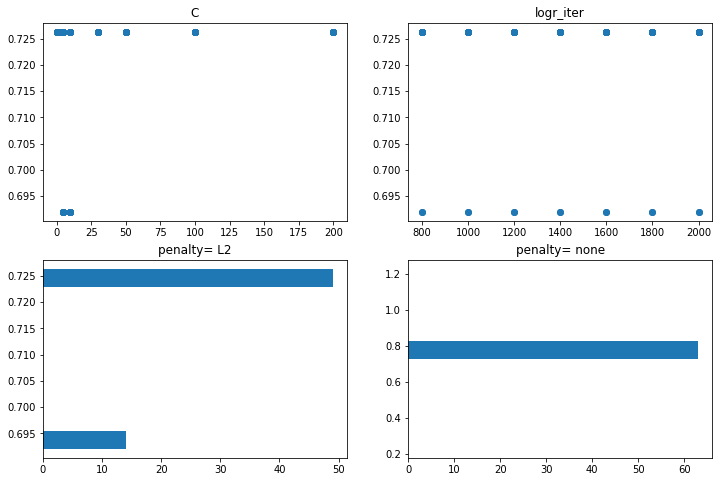

In [217]:
# 
# –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è
figure, axis = plt.subplots(2, 2, figsize=(12,8))
axis[0,0].scatter(y=out_logr['accuracy_logr_valid'],x=out_logr['C'])
axis[0,0].set_title('C')
axis[0,1].scatter(y=out_logr['accuracy_logr_valid'],x=out_logr['logr_iter'])
axis[0,1].set_title('logr_iter')
axis[1,0].hist(out_logr[out_logr['penalty']=='l2']['accuracy_logr_valid'],orientation='horizontal')
axis[1,0].set_title('penalty= L2')
axis[1,1].hist(out_logr[out_logr['penalty']=='none']['accuracy_logr_valid'],orientation='horizontal')
axis[1,1].set_title('penalty= none')

plt.show();

–í–∏–¥–∏–º, —á—Ç–æ –≤ —Ü–µ–ª–æ–º –¥–ª—è –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –Ω–∞–ª–∏—á–∏–µ –≤—Å–µ–≥–æ –¥–≤—É—Ö –∑–Ω–∞—á–µ–Ω–∏–π –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞.

In [218]:
out_logr['accuracy_logr_valid'].value_counts(normalize=True)

0.726283    0.889764
0.692068    0.110236
Name: accuracy_logr_valid, dtype: float64

72,6% –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –¥–∞—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –º–æ–¥–µ–ª—å.
–ü–æ—Å–º–æ—Ç—Ä–∏–º "–ø—É—Å—Ç—É—é" –º–æ–¥–µ–ª—å –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏–∏- –±–µ–∑ –∑–∞–¥–∞–Ω–Ω—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [219]:
model_logr = LogisticRegression(random_state=12345, solver='lbfgs')
model_logr.fit(features_train, target_train)
predictions_valid = model_logr.predict(features_valid)
print(accuracy_score(target_valid, predictions_valid))

0.7262830482115086


–¢.–æ. –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –Ω–∞ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –º—ã –º–æ–∂–µ–º –±—Ä–∞—Ç—å –º–æ–¥–µ–ª—å –ª–æ–≥.—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (–ø—Ä–∏ solver='lbfgs')

#### –ù–µ—Å–∫–æ–ª—å–∫–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –†–µ—à–∞—é—â–µ–µ –¥–µ—Ä–µ–≤–æ

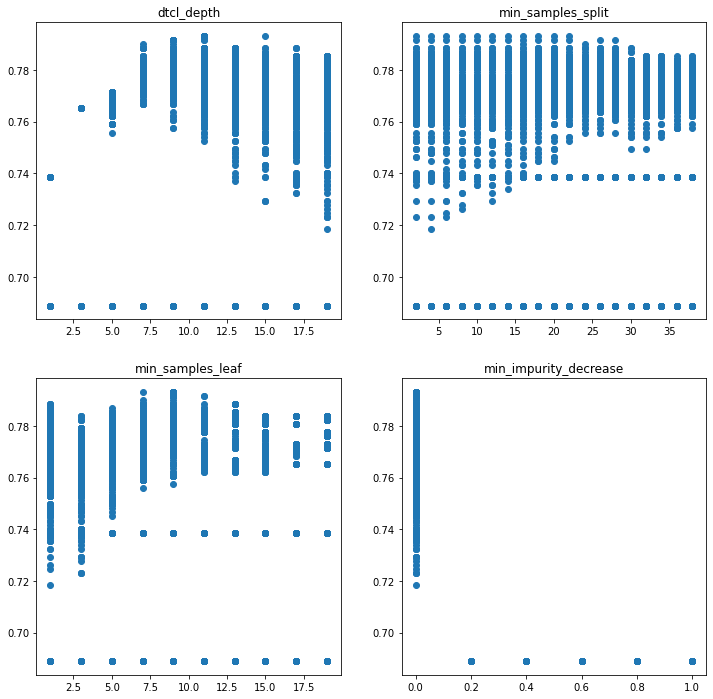

In [220]:
# —Ä–µ—à–∞—é—â–µ–µ –¥–µ—Ä–µ–≤–æ
figure, axis = plt.subplots(2, 2, figsize=(12,12))
axis[0,0].scatter(y=out_dtcl['accuracy_dtcl_valid'],x=out_dtcl['dtcl_depth'])
axis[0,0].set_title('dtcl_depth')
axis[0,1].scatter(y=out_dtcl['accuracy_dtcl_valid'],x=out_dtcl['min_samples_split'])
axis[0,1].set_title('min_samples_split')
axis[1,0].scatter(y=out_dtcl['accuracy_dtcl_valid'],x=out_dtcl['min_samples_leaf'])
axis[1,0].set_title('min_samples_leaf')
axis[1,1].scatter(y=out_dtcl['accuracy_dtcl_valid'],x=out_dtcl['min_impurity_decrease'])
axis[1,1].set_title('min_impurity_decrease')
plt.show();

–í–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à–µ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –≥–ª—É–±–∏–Ω—ã.

min_impurity_decrease" —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –∑–Ω–∞—á–µ–Ω–∏–∏ —Ä–∞–≤–Ω–æ–º 0

min_sample_leaf –¥–∞–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –±–æ–ª—å—à–µ 6

min_samle_split –º–æ–∂–Ω–æ —Å—Ç–∞–≤–∏—Ç—å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–π (–æ—Ç 2)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞ - —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–∞—á–µ—Å—Ç–≤–æ–º

In [221]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π —Å —Ä–µ—à–∞—é—à–∏–º –¥–µ—Ä–µ–≤–æ–º: ',out_dtcl.shape[0])
print()
print('–¢–∞–±–ª–∏—Ü–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è 5% –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤')
idx = out_dtcl['accuracy_dtcl_valid'].nlargest(out_dtcl.shape[0]//20).index
out_dtcl.loc[idx].head(20)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π —Å —Ä–µ—à–∞—é—à–∏–º –¥–µ—Ä–µ–≤–æ–º:  22801

–¢–∞–±–ª–∏—Ü–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è 5% –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤


common_fetch  dtcl_depth  accuracy_dtcl_train  accuracy_dtcl_valid  \
11450          0.25        11.0             0.847510             0.793157   
11570          0.25        11.0             0.847510             0.793157   
11690          0.25        11.0             0.847510             0.793157   
11810          0.25        11.0             0.847510             0.793157   
11930          0.25        11.0             0.847510             0.793157   
12050          0.25        11.0             0.847510             0.793157   
12170          0.25        11.0             0.847510             0.793157   
12290          0.25        11.0             0.847510             0.793157   
12410          0.25        11.0             0.847510             0.793157   
12530          0.25        11.0             0.847510             0.793157   
17197          0.25        15.0             0.854253             0.793157   
9170           0.25         9.0             0.840768             0.791602   
9290           0.25         9.0             0.840768             0.791602   
9410           0.25         9.0             0.840768             0.791602   
9530           0.25         9.0             0.840768             0.791602   
9650           0.25         9.0             0.840768             0.791602   
9770           0.25         9.0             0.840768             0.791602   
9890           0.25         9.0             0.840768             0.791602   
10010          0.25         9.0             0.840768             0.791602   
10130          0.25         9.0             0.840768             0.791602   

       min_samples_split  min_samples_leaf  min_impurity_decrease criterion  
11450                2.0               9.0                    0.0   entropy  
11570                4.0               9.0                    0.0   entropy  
11690                6.0               9.0                    0.0   entropy  
11810                8.0               9.0                    0.0   entropy  
11930               10.0               9.0                    0.0   entropy  
12050               12.0               9.0                    0.0   entropy  
12170               14.0               9.0                    0.0   entropy  
12290               16.0               9.0                    0.0   entropy  
12410               18.0               9.0                    0.0   entropy  
12530               20.0               9.0                    0.0   entropy  
17197               22.0               7.0                    0.0      gini  
9170                 2.0               9.0                    0.0   entropy  
9290                 4.0               9.0                    0.0   entropy  
9410                 6.0               9.0                    0.0   entropy  
9530                 8.0               9.0                    0.0   entropy  
9650                10.0               9.0                    0.0   entropy  
9770                12.0               9.0                    0.0   entropy  
9890                14.0               9.0                    0.0   entropy  
10010               16.0               9.0                    0.0   entropy  
10130               18.0               9.0                    0.0   entropy

–í–∏–¥–∏–º, —á—Ç–æ –¥–ª—è –ª—É—á—à–∏—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã:
- max_depth - 11
- min_samples_split - –æ—Ç 2 –∏ –≤—ã—à–µ (–¥–µ—Ñ–æ–ª—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ)
- min_samples_leaf - 9
- criterion - entropy

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤

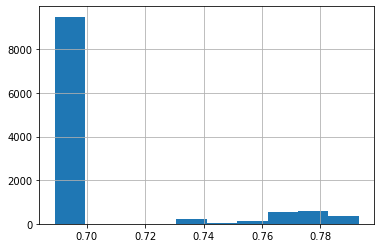

In [222]:
# Gini - –¥–ª—è –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
out_dtcl[(out_dtcl['criterion']=='gini')]['accuracy_dtcl_valid'].hist();


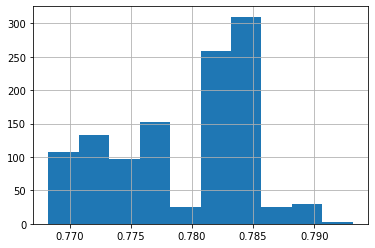

In [223]:
# Gini –ª—É—á—à–∏–µ 5% –æ—Ü–µ–Ω–æ–∫
out_dtcl[(out_dtcl['criterion']=='gini')]['accuracy_dtcl_valid'].nlargest(out_dtcl.shape[0]//20).hist();

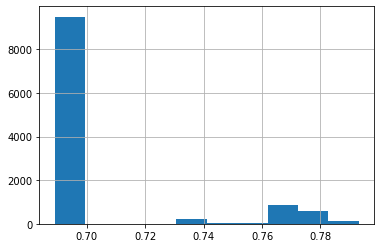

In [224]:
# entropy - –¥–ª—è –≤—Å–µ—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
out_dtcl[out_dtcl['criterion']=='entropy']['accuracy_dtcl_valid'].hist();

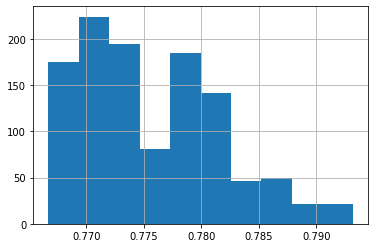

In [225]:
# entropy - –¥–ª—è –ª—É—á—à–∏—Ö 5% –æ—Ü–µ–Ω–æ–∫
out_dtcl[out_dtcl['criterion']=='entropy']['accuracy_dtcl_valid'].nlargest(out_dtcl.shape[0]//20).hist();

–ü–æ—Å–º–æ—Ç—Ä–∏–º - –∫–∞–∫–∏–µ –¥–æ–ª–∏ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –¥–ª—è –ª—É—á—à–∏—Ö 1% –æ—Ü–µ–Ω–æ–∫

In [226]:
idx = out_dtcl['accuracy_dtcl_valid'].nlargest(out_dtcl.shape[0]//100).index
pd.concat((out_dtcl.loc[idx]['criterion'].value_counts(normalize=True),
           out_dtcl.loc[idx]['criterion'].value_counts()), axis=1)

criterion  criterion
gini      0.596491        136
entropy   0.403509         92

–í–∏–¥–∏–º, —á—Ç–æ –≤ —Ü–µ–ª–æ–º –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ. –ù–æ –¥–ª—è –ª—É—á—à–∏—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (1%) –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –∫—Ä–∏—Ç–µ—Ä–∏–π entropy

#### –ù–µ—Å–∫–æ–ª—å–∫–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞

In [227]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞:', out_rfcl.shape[0])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞: 5601


Text(0.5, 1.0, 'min_samples_leaf')

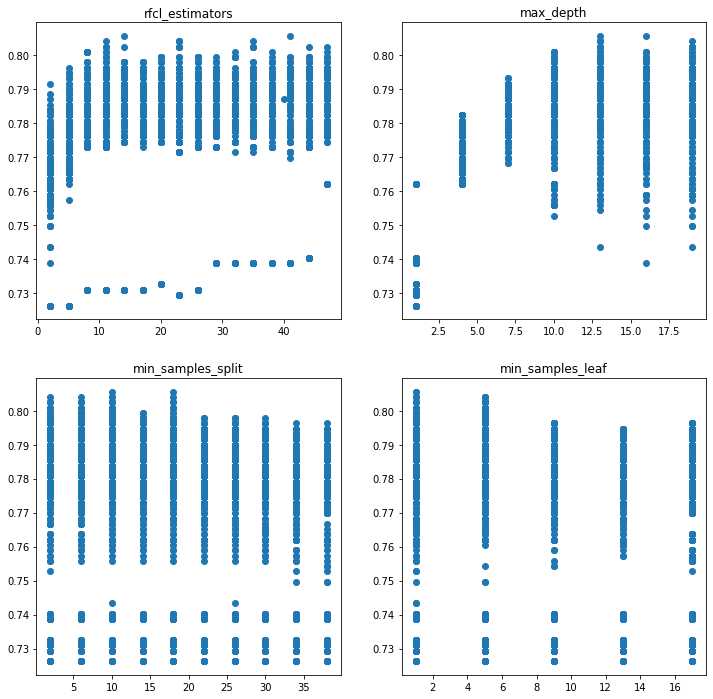

In [228]:
# —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å
figure, axis = plt.subplots(2, 2, figsize=(12,12))
axis[0,0].scatter(y=out_rfcl['accuracy_rfcl_valid'],x=out_rfcl['rfcl_estimators'])
axis[0,0].set_title('rfcl_estimators')
axis[0,1].scatter(y=out_rfcl['accuracy_rfcl_valid'],x=out_rfcl['max_depth'])
axis[0,1].set_title('max_depth')
axis[1,0].scatter(y=out_rfcl['accuracy_rfcl_valid'],x=out_rfcl['min_samples_split'])
axis[1,0].set_title('min_samples_split')
axis[1,1].scatter(y=out_rfcl['accuracy_rfcl_valid'],x=out_rfcl['min_samples_leaf'])
axis[1,1].set_title('min_samples_leaf')

–ü–æ—Å–º–æ—Ç—Ä–∏–º –ª—É—á—à–∏–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏

In [229]:
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º: ',out_rfcl.shape[0])
print()
print('–¢–∞–±–ª–∏—Ü–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è 5% –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤')
idx = out_rfcl['accuracy_rfcl_valid'].nlargest(out_rfcl.shape[0]//20).index
out_rfcl.loc[idx].head(20)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º:  5601

–¢–∞–±–ª–∏—Ü–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è 5% –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤


common_fetch  rfcl_estimators  accuracy_rfcl_train  accuracy_rfcl_valid  \
1661          0.25             14.0             0.898340             0.805599   
4771          0.25             41.0             0.871369             0.805599   
1361          0.25             11.0             0.908195             0.804044   
2652          0.25             23.0             0.869813             0.804044   
2657          0.25             23.0             0.869813             0.804044   
2662          0.25             23.0             0.869813             0.804044   
4071          0.25             35.0             0.871888             0.804044   
1352          0.25             11.0             0.872925             0.802488   
1357          0.25             11.0             0.872925             0.802488   
1362          0.25             11.0             0.872925             0.802488   
1711          0.25             14.0             0.906639             0.802488   
2752          0.25             23.0             0.870332             0.802488   
2757          0.25             23.0             0.870332             0.802488   
2762          0.25             23.0             0.870332             0.802488   
4052          0.25             35.0             0.870332             0.802488   
4057          0.25             35.0             0.870332             0.802488   
4062          0.25             35.0             0.870332             0.802488   
5121          0.25             44.0             0.872407             0.802488   
5471          0.25             47.0             0.872407             0.802488   
852           0.25              8.0             0.854253             0.800933   

      max_depth  min_samples_split  min_samples_leaf  
1661       16.0               10.0               1.0  
4771       13.0               18.0               1.0  
1361       19.0               10.0               1.0  
2652       13.0                2.0               5.0  
2657       13.0                6.0               5.0  
2662       13.0               10.0               5.0  
4071       13.0               18.0               1.0  
1352       19.0                2.0               5.0  
1357       19.0                6.0               5.0  
1362       19.0               10.0               5.0  
1711       19.0               10.0               1.0  
2752       19.0                2.0               5.0  
2757       19.0                6.0               5.0  
2762       19.0               10.0               5.0  
4052       13.0                2.0               5.0  
4057       13.0                6.0               5.0  
4062       13.0               10.0               5.0  
5121       13.0               18.0               1.0  
5471       13.0               18.0               1.0  
852        10.0                2.0               5.0

In [230]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω—â–∏–∫–æ–≤ –¥–ª—è 5% –ª—É—á—à–∏—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π
out_rfcl.loc[idx].rfcl_estimators.value_counts()

11.0    29
23.0    28
14.0    27
47.0    23
29.0    23
44.0    22
17.0    20
8.0     19
26.0    18
20.0    16
32.0    14
41.0    14
38.0    11
35.0    11
5.0      5
Name: rfcl_estimators, dtype: int64

In [232]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ max_depth –¥–ª—è 5% –ª—É—á—à–∏—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π
out_rfcl.loc[idx].max_depth.value_counts()

13.0    123
19.0     57
16.0     55
10.0     45
Name: max_depth, dtype: int64

–í–∏–¥–∏–º, —á—Ç–æ
- —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–ª—è –¢–æ–ø20 - 13-19
- min_samples_split –¥–ª—è —É–¥–∞—á–Ω—ã—Ö —Ä–µ—à–µ–Ω–∏–π –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å 2
- min_samples_leaf –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å —Ä–∞–≤–Ω—ã–º 5
- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω—â–∏–∫–æ–≤ - –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –ª—É—á—à–∏—Ö 5% –æ—Ü–µ–Ω–æ–∫ —Ä–∞–≤–Ω–æ 11, –ø—Ä–∏ —ç—Ç–æ–º –∑–Ω–∞—á–µ–Ω–∏–µ 23 –ø–æ—á—Ç–∏ —Ç–∞–∫–∂–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –¢–æ–ø–µ –∏ —ç—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–æ—á–µ—Ç–∞–µ—Ç—Å—è —Å –≥–ª—É–±–∏–Ω–æ–π 13

–û–±—â–∏–π –≤—ã–≤–æ–¥: 
- –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —É—Å—Ç–æ–π—á–∏–≤–∞ –≤ –ø–ª–∞–Ω–µ –æ—Ü–µ–Ω–æ–∫ –∫ –∏–∑–º–µ–Ω–µ–Ω–∏—é –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –Ω–æ –æ–±–ª–∞–¥–∞–µ—Ç –º–µ–Ω—å—à–∏–º –∏–∑ –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–∞—á–µ—Å—Ç–≤–æ–º –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ 0.7262.
- –º–æ–¥–µ–ª—å —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞ –¥–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç (0.7931) –ª—É—á—à–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: max_depth=11, min_samle_leaf = 9, criterion = entropy
- –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–∞–µ—Ç —Å–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç 0.8056. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: n_estimators=41, max_depth=13, min_samples_split=18, min_samples_leaf=1

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –±—É–¥–µ–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å —É–∫–∞–∑–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

## –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

In [236]:
# –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ –¥–∞–µ—Ç —Å–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç 0.810205.
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: n_estimators=23, max_depth=13, min_samples_split=5
model_rfcl_test = RandomForestClassifier(
        random_state=12345, n_estimators=41,max_depth=13,
        min_samples_leaf=1,min_samples_split=18)
model_rfcl_test.fit(features_train, target_train)
#predictions_valid = model_rfcl_test.predict(features_valid)
#accuracy_rfcl_valid = accuracy_score(target_valid, predictions_valid)
predictions_test = model_rfcl_test.predict(features_test)
accuracy_rfcl_test = accuracy_score(target_test, predictions_test)
"print('–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:',accuracy_rfcl_valid.round(5))
print('–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:',accuracy_rfcl_test.round(5))

–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.8056
–ö–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.79316


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>–ü–æ–ª—É—á–∏–ª –º–µ–Ω—å—à–∏–π —Å–∫–æ—Ä –Ω–∞ —Ç–µ—Å—Ç–µ.

–ß—Ç–æ –∂–µ –¥–µ–ª–∞—Ç—å? –≠—Ç–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —É—Ö—É–¥—à–µ–Ω–∏—è, –æ—Ç —É—Å–ª–æ–≤–∏–π –∏—Å—Ö–æ–¥–Ω–æ–π –∑–∞–¥–∞—á–∏ –∏ –æ—Ç —Ü–µ–Ω—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –∑–∞–¥–∞—á–∞ - –ø–æ–ª—É—á–∏—Ç—å –æ—Ü–µ–Ω–∫—É –≤—ã—à–µ 0.75 - –º—ã —Å –Ω–µ–π —Å–ø—Ä–∞–≤–∏–ª–∏—Å—å. –î–∞–ª–µ–µ —Å–º–æ—Ç—Ä–∏–º —Ä–∞–∑–º–µ—Ä —É—Ö—É–¥—à–µ–Ω–∏—è: –Ω–∞—à —Å–ª—É—á–∞–π- —Å–Ω–∏–∂–µ–Ω–∏–µ –Ω–∞ 1,54% (–Ω–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞). –ù–µ –∑–Ω–∞—é, –∫–æ–Ω–µ—á–Ω–æ, –æ–±—â–µ–π –ø—Ä–∞–∫—Ç–∏–∫–∏, –Ω–æ –ø–æ –º–æ–µ–º—É –º–Ω–µ–Ω–∏—é, —ç—Ç–æ –¥–æ–ø—É—Å—Ç–∏–º–æ –∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –Ω–∏—á–µ–≥–æ –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç—å –Ω–µ –Ω–∞–¥–æ. –£—Ö—É–¥—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω–∞ 5-10% –¥–æ–ª–∂–Ω–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –Ω–µ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π (–ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω–æ–π, –Ω–µ–¥–æ–æ–±—É—á–µ–Ω–Ω–æ–π) –º–æ–¥–µ–ª–∏, –ª–∏–±–æ –æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –∫ –∑–∞–¥–∞—á–µ –º–æ–¥–µ–ª–∏ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ —Ç–∏–ø–∞. –ù—É –∏, –µ—Å–ª–∏ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –ø–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ –Ω–∞—à–µ —Ä–µ—à–µ–Ω–∏–µ (–º–æ–¥–µ–ª—å) –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–∞—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –∑–∞—Ç—Ä–∞—Ç—ã –Ω–∞ –µ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ: –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –∏ –≤ –º–∞—Å—Å–µ –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ –º—ã –ø—Ä–æ—Å—Ç–æ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ—Ç –∂–µ –¥–∞—Ç–∞—Å–µ—Ç –∏ –ø–æ—Ö–æ–∂–∏–µ —Å–ø–ª–∏—Ç—ã –Ω–∞ –≤—ã–±–æ—Ä–∫–∏. –î–æ–ø –∑–∞—Ç—Ä–∞—Ç—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–∏–µ: –≤—Ä–µ–º—è –Ω–∞ –ø–µ—Ä–µ–Ω–∞—Å—Ç—Ä–æ–π–∫—É –∏ –æ–±—É—á–µ–Ω–∏–µ. –í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∑–∞–¥–∞—á–∞—Ö, –∫–∞–∫ —è –ø–æ–Ω–∏–º–∞—é- –Ω–∞ –ø–æ—Ä—è–¥–∫–∏ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö, —Ç–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ "–ø—Ä–µ–¥–µ–ª–∞–µ–º" –Ω–µ –ø—Ä–∏–º–µ–Ω–∏–º –≤ –≤–∏–¥—É –µ–≥–æ –∑–∞—Ç—Ä–∞—Ç–Ω–æ—Å—Ç–∏- –Ω–æ –≤ —Ç–∞–∫–∏—Ö –∑–∞–¥–∞—á–∞—Ö –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —Å–æ–≤—Å–µ–º –¥—Ä—É–≥–æ–π –ø–æ–¥—Ö–æ–¥ –∫ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—é –∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—é —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞. 
    </font>
</div>

## (–±–æ–Ω—É—Å) –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å

–°—Ä–∞–≤–Ω–∏–º –Ω–∞—à—É –º–æ–¥–µ–ª—å —Å –º–æ–¥–µ–ª—å—é, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–µ–π –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–π—Å—è –∫–ª–∞—Å—Å

In [52]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features,target)
print('–ö–∞—á–µ—Å—Ç–≤–æ dummy –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ',dummy_clf.score(features,target))
dummy_clf.fit(features_train,target_train)
print('–ö–∞—á–µ—Å—Ç–≤–æ dummy –º–æ–¥–µ–ª–∏, –æ–±—É—á–µ–Ω–Ω–æ–π –Ω–∞ —Ç—Ä–µ–Ω. –¥–∞–Ω–Ω—ã—Ö, –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏',
      dummy_clf.score(features_test,target_test))

–ö–∞—á–µ—Å—Ç–≤–æ dummy –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ 0.693528313627878
–ö–∞—á–µ—Å—Ç–≤–æ dummy –º–æ–¥–µ–ª–∏, –æ–±—É—á–µ–Ω–Ω–æ–π –Ω–∞ —Ç—Ä–µ–Ω. –¥–∞–Ω–Ω—ã—Ö, –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ 0.6951788491446346


–¢.–æ. –Ω–∞—à—É –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–π.